In [1]:
import sys
sys.path.append("/home")

In [19]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as PilImage

from utils.model_tools.customdatasets import CelebADataset
import utils.view_tools as view

from fastai.vision.data import imagenet_stats
from fastai.vision import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
path_to_celeba = '/home/datadrive/asya/datasets/celeba'

# 1. Datasets, DataLoaders

In [22]:
# we will use normalization used in other models
normalization = imagenet_stats
mean, std = normalization
target_type = ['attr']
relevant_attribute_names = ['Smiling', 'Young', 'Male', 'Eyeglasses', 'Attractive']
batch_size = 8


my_transforms = transforms.Compose(
    [transforms.Resize((224,224)), 
     transforms.ToTensor(), 
     transforms.Normalize(mean, std)]) #imagenet transforms
celeba_train_ds = CelebADataset(path_to_celeba, 
                       split='train', 
                       target_type=target_type, 
                       relevant_attribute_names=relevant_attribute_names, 
                       transform=my_transforms)
celeba_valid_ds = CelebADataset(path_to_celeba, 
                       split='valid', 
                       target_type=target_type, 
                       relevant_attribute_names=relevant_attribute_names, 
                       transform=my_transforms)
celeba_test_ds = CelebADataset(path_to_celeba, 
                       split='test', 
                       target_type=target_type, 
                       relevant_attribute_names=relevant_attribute_names, 
                       transform=my_transforms)
train_loader = DataLoader(celeba_train_ds, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(celeba_valid_ds, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(celeba_test_ds, batch_size=batch_size, shuffle=True)

#fastai_databunch = DataBunch(train_dl=train_loader, valid_dl=valid_loader, test_dl=test_loader)

# 2. Viewing Images
Let's create a small little dataset to view some images

In [7]:
celeba_view = CelebADataset(path_to_celeba, 
                       split='train', 
                       target_type=['orig_img', 'attr'], 
                       relevant_attribute_names=relevant_attribute_names, 
                       transform=my_transforms)
view_loader = DataLoader(celeba_view, batch_size=batch_size, shuffle=True)


In [23]:
n_rows_view = 2
n_cols_view = batch_size // n_rows_view

# Get a random train batch
for data in view_loader:
    break

img, target = data
img_orig, attr = target

In [24]:
# notice how img is the transformed img_orig. 
# the channels are permuted
print("transformed shape: \t", img.shape)
print("original shape: \t", img_orig.shape)

transformed shape: 	 torch.Size([8, 3, 224, 224])
original shape: 	 torch.Size([8, 218, 178, 3])


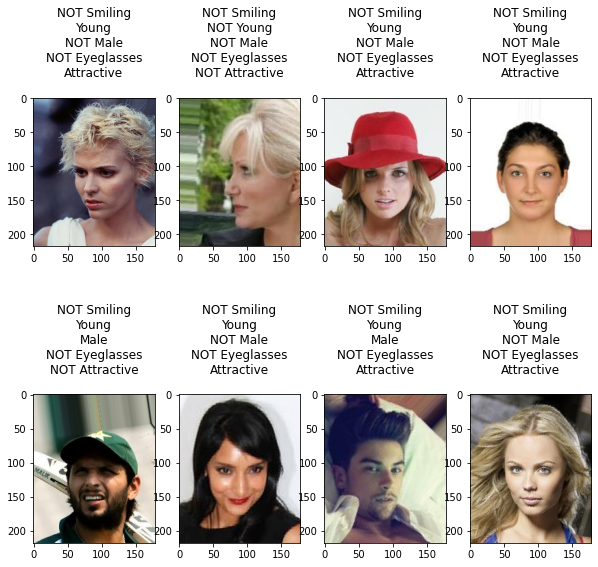

In [25]:
# view original images and some attributes
fig, axs = plt.subplots(n_rows_view, n_cols_view, figsize=(10, 10))
for i, ax in enumerate(axs.flatten()):
    
    
    attribute_string = ''
    for ii, attribute in enumerate(attr[i]):
        if attribute == 0:
            attribute_string += 'NOT '
        attribute_string += celeba_train_ds.relevant_attribute_names[ii]
        attribute_string += '\n'
    ax.set_title(attribute_string)
    ax.imshow(img_orig[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


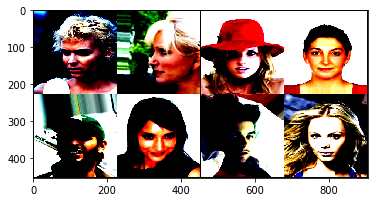

In [26]:
# view tensors, notice how they are not coherent because of unormalization
image_grid = make_grid(img, nrow=n_cols_view)
view.show_grid(image_grid)

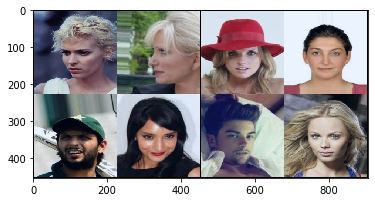

In [29]:
# although we normalize to 0-1, we do not scale back to original scale. 
# notice how colors are different compared to original images
image_grid = make_grid(img, nrow=n_cols_view, normalize=True)
view.show_grid(image_grid)

/home/utils/view_tools.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor((n_std * tensor + n_mean) * 255, dtype=torch.uint8)


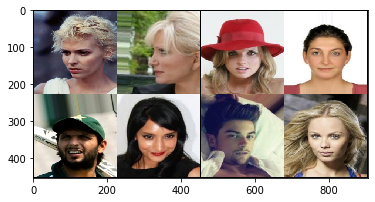

In [30]:
# finally, view original images by denormalizing, notice how it is like the original image
image_grid = make_grid(view.denorm(img, norm=normalization), nrow=n_cols_view)
view.show_grid(image_grid)